# Analyse missing data to assess quality of (early) records

This notebook focuses on vanessa atalanta (migratory) and Inachis io (local). The output/figures of this notebook are stored in the _missing-data_ subdirectory.

In [1]:
# import libraries
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(
    style="darkgrid",
    color_codes=True,
    palette='Dark2',
)

# import (personal) functions & variables
from funcs import import_pickled_data, which_cols, number_of_day_to_date, highlight_years, first_last_day
from vals import sheets, yrs
species, species_long, species_summed = import_pickled_data()

### How many nan-values does the Kaliningrad dataset contain (especially in the early years)?

Here, we want to focus on the temperature as well as insect count.

In [2]:
# import data
va = species['Vanessa atalanta'].reset_index()
va.name = 'Vanessa atalanta'
io = species['Inachis io'].reset_index()
io.name = 'Inachis io'

In [3]:
# create new pandas dataframe to hold count of nan's
nans = pd.DataFrame(columns=['year', 'species', 'var', 'nans_tot', 'nans_apr'])

# loop over species data frames
for s in [va, io]:
    # loop over years
    for y in yrs:
        # number of nan's in temperature
        tmp_nans = s['Temp'][s.Year == y].isnull().sum()
        tmp_nans_apr = s['Temp'][s.Year == y][:31].isnull().sum()
        # add to nan data frame
        nans = nans.append(
            pd.Series([y, s.name, 'tmp', tmp_nans, tmp_nans_apr], 
                      index=nans.columns),
            ignore_index=True
        )
        # number of nan's in (insect) count
        cnt_nans = s['count'][s.Year == y].isnull().sum()
        cnt_nans_apr = s['count'][s.Year == y][:31].isnull().sum()
        # add to nan data frame
        nans = nans.append(
            pd.Series([y, s.name, 'cnt', cnt_nans, cnt_nans_apr], 
                      index=nans.columns),
            ignore_index=True
        )
nans

,year,species,var,nans_tot,nans_apr
0,1982,Vanessa atalanta,tmp,215,31
1,1982,Vanessa atalanta,cnt,177,31
2,1983,Vanessa atalanta,tmp,146,0
3,1983,Vanessa atalanta,cnt,89,7
4,1984,Vanessa atalanta,tmp,146,31
...,...,...,...,...,...
151,2018,Inachis io,cnt,9,2
152,2019,Inachis io,tmp,9,0
153,2019,Inachis io,cnt,7,0
154,2020,Inachis io,tmp,11,3


In [4]:
def plot_nans(species):
    fig, axs = plt.subplots(2, 1, figsize=(12,8))

    sns.barplot(data=nans[nans.species == species], x='year', y='nans_apr', hue='var', ax=axs[0])
    sns.barplot(data=nans[nans.species == species], x='year', y='nans_tot', hue='var', ax=axs[1])

    axs[0].set_xticklabels([str(year) for year in range(1982, 2021, 1)], rotation=90)
    axs[1].set_xticklabels([str(year) for year in range(1982, 2021, 1)], rotation=90)

    fig.suptitle(f'{species}: Number of missing values in April & entire year')
    fig.savefig(f'../figs/missing-data/{species}.pdf', bbox_inches='tight')

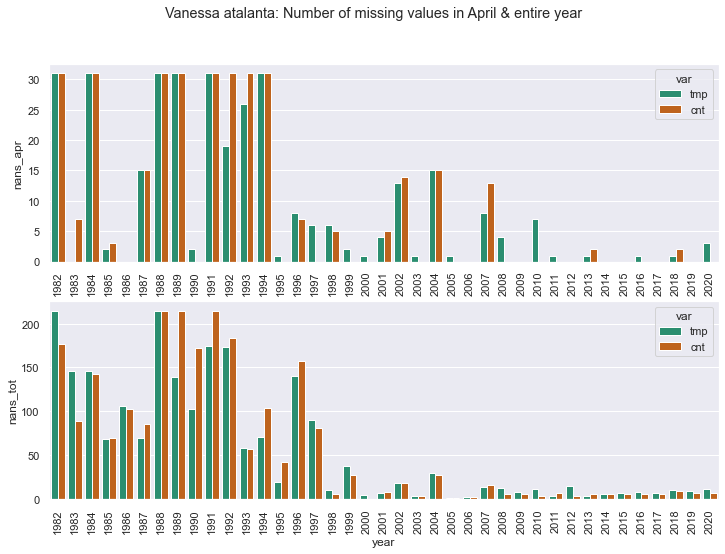

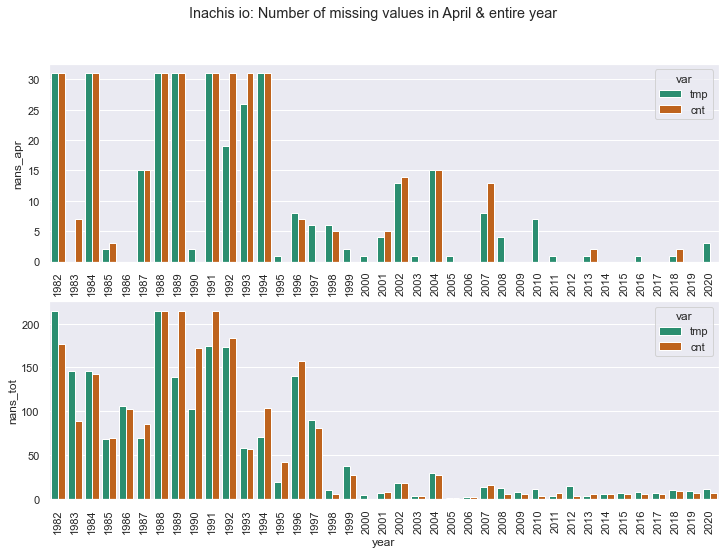

In [5]:
plot_nans('Vanessa atalanta')
plot_nans('Inachis io')

### Conclusion:

The two figures are the same, consequently, the Kaliningrad researchers weren't doing any partial insect recording. If there's missing data for a single species, no other insects were recorded at that day (obviously, the same reasoning holds for temperature).